In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as pyplot
import numpy as np
import os
import seaborn as sns
from tensorflow.keras.layers import TextVectorization
import matplotlib.pyplot as plt

#### 1.Preprocesse data

In [2]:
train_data =  os.path.join("data","jigsaw-toxic-comment-train-processed-seqlen128.csv")
test_data = os.path.join("data","test-processed-seqlen128.csv")
validate_data = os.path.join("data","validation-processed-seqlen128.csv")

In [3]:
df_train = pd.read_csv(train_data)
df_val = pd.read_csv(validate_data)
df_test = pd.read_csv(test_data)

In [4]:
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"(101, 35936, 10817, 117, 146, 112, 181, 30181,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"(101, 107, 15946, 146, 10944, 112, 188, 13086,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"(101, 11065, 117, 52523, 117, 10301, 15127, 51...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0,"(101, 131, 43325, 117, 146, 12888, 13028, 1479...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0,"(101, 134, 134, 22716, 19111, 101695, 134, 134...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0,"(101, 134, 134, 48201, 18969, 10135, 13028, 10...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0,"(101, 47430, 11369, 144, 72918, 10731, 30118, ...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [5]:
df_val

,id,comment_text,lang,toxic,input_word_ids,input_mask,all_segment_id
0,0,Este usuario ni siquiera llega al rango de ...,es,0,"(101, 12515, 82849, 10414, 10294, 39190, 10113...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Il testo di questa voce pare esser scopiazzato...,it,0,"(101, 10282, 29346, 10120, 14508, 19696, 22606...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1,"(101, 32286, 119, 101911, 11419, 27119, 10797,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0,"(101, 11916, 10824, 71339, 10245, 15499, 24542...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0,"(101, 47197, 20267, 10371, 14349, 66513, 31268...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
7995,7995,Il fatto è che la pagina dei personaggi minor...,it,0,"(101, 10282, 16966, 262, 10262, 10109, 24400, ...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7996,7996,El imbesil ete dela luna no se entera ni ostia...,es,1,"(101, 10224, 10211, 16216, 11030, 10131, 10112...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7997,7997,olum sız manyakmısınz siz adam sıze sanal yıld...,tr,1,"(101, 30668, 10465, 187, 30471, 11299, 10710, ...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7998,7998,El mapa del reinado de Alhaken esta ligerament...,es,0,"(101, 10224, 22474, 10127, 40178, 10104, 10883...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
df_test

,id,comment_text,input_word_ids,input_mask,all_segment_id
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,"(101, 17376, 14516, 19165, 56324, 10116, 24542...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"Вполне возможно, но я пока не вижу необходимо...","(101, 511, 53204, 36689, 44504, 117, 11279, 57...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,"Quindi tu sei uno di quelli conservativi , ...","(101, 35921, 17938, 13055, 13868, 11381, 10120...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,"(101, 59170, 16822, 99087, 10284, 83972, 51782...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,"(101, 131, 32070, 11759, 131, 11045, 23388, 10...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
63807,63807,"No, non risponderò, come preannunciato. Prefer...","(101, 10657, 117, 10446, 29956, 54609, 102754,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
63808,63808,"Ciao, I tecnici della Wikimedia Foundation sta...","(101, 51457, 14875, 117, 146, 10361, 101788, 1...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
63809,63809,innnazitutto ti ringrazio per i ringraziamenti...,"(101, 15203, 10219, 46680, 109056, 14382, 2155...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
63810,63810,Kaç olumlu oy gerekiyor? Şu an 7 oldu. Hayır...,"(101, 25444, 13406, 30668, 107357, 183, 10157,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
df_train[df_train.columns[2:8]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
223544,0,0,0,0,0,0
223545,0,0,0,0,0,0
223546,0,0,0,0,0,0
223547,1,0,1,0,1,0


In [8]:
x = df_train['comment_text'].values
y = df_train[df_train.columns[2:8]].values
x.shape,y.shape

((223549,), (223549, 6))

In [9]:
max_features = 200000

In [10]:
vectorizer = TextVectorization(max_tokens=max_features, 
                       output_sequence_length=1800,
                       output_mode="int")

In [11]:
vectorizer.adapt(x)

In [12]:
vectorizer(x[1])

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   1,   53, 2739, ...,    0,    0,    0], dtype=int64)>

In [13]:
vectorized_text = vectorizer(x)

In [14]:
vectorized_text

<tf.Tensor: shape=(223549, 1800), dtype=int64, numpy=
array([[  645,    77,     2, ...,     0,     0,     0],
       [    1,    53,  2739, ...,     0,     0,     0],
       [  448,   424,    70, ...,     0,     0,     0],
       ...,
       [ 2027,    16,     7, ...,     0,     0,     0],
       [ 6890,  7435,     9, ...,     0,     0,     0],
       [14963, 29071,  4314, ...,     0,     0,     0]], dtype=int64)>

In [15]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(10000)
dataset = dataset.batch(32)
dataset = dataset.prefetch(tf.data.AUTOTUNE)

In [16]:
train = dataset.take(round(len(dataset)*0.8))
val = dataset.skip(round(len(dataset)*0.8)).take(round(len(dataset)*0.1))
test = dataset.skip(round(len(dataset)*0.9)).take(round(len(dataset)*0.1))

In [17]:
train.as_numpy_iterator().next()

(array([[    6,  6117,  2846, ...,     0,     0,     0],
        [  309,  1252,    98, ...,     0,     0,     0],
        [82714, 62884,     6, ...,     0,     0,     0],
        ...,
        [    8,    67,   475, ...,     0,     0,     0],
        [ 1759,     4,  8131, ...,     0,     0,     0],
        [    5,    94,    13, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0,

#### 2.Create sequential model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [19]:
model = Sequential([
    Embedding(max_features+1,32),
    Bidirectional(LSTM(32, activation= 'tanh')),
    Dense(128,activation='relu'),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dense(6,activation='sigmoid')
])

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

In [22]:
history = model.fit(train,epochs=5,validation_data=val)

Epoch 1/5


5589/5589 [==============================] - 678s 120ms/step - loss: 0.0650 - accuracy: 0.9788 - val_loss: 0.0654 - val_accuracy: 0.9969
Epoch 2/5
5589/5589 [==============================] - 667s 119ms/step - loss: 0.0472 - accuracy: 0.9906 - val_loss: 0.0624 - val_accuracy: 0.9970
Epoch 3/5
5589/5589 [==============================] - 668s 119ms/step - loss: 0.0419 - accuracy: 0.9860 - val_loss: 0.0593 - val_accuracy: 0.9970
Epoch 4/5
5589/5589 [==============================] - 668s 119ms/step - loss: 0.0368 - accuracy: 0.9936 - val_loss: 0.0584 - val_accuracy: 0.9964
Epoch 5/5
5589/5589 [==============================] - 668s 119ms/step - loss: 0.0329 - accuracy: 0.9934 - val_loss: 0.0586 - val_accuracy: 0.9973


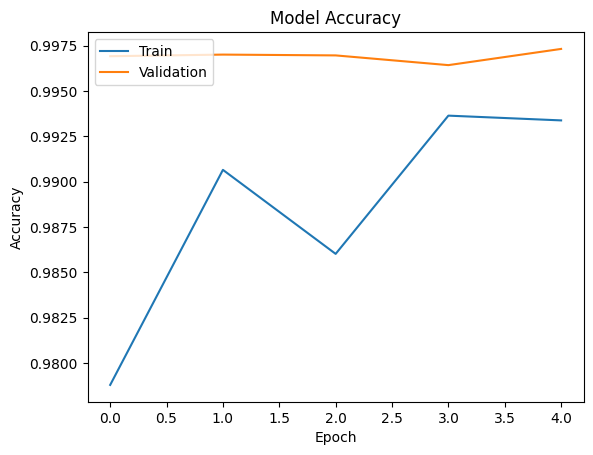

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

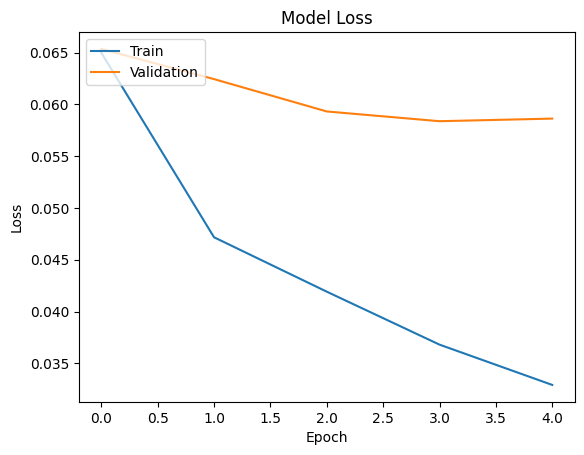

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
model.save('model.keras')

#### 3.Predictions

In [31]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [33]:
for batch in test.as_numpy_iterator():
    x_true, y_true = batch
    y_hat = model.predict(x_true)

    y_true = y_true.flatten()
    y_hat = y_hat.flatten()

    pre.update_state(y_true,y_hat)
    re.update_state(y_true, y_hat)
    acc.update_state(y_true, y_hat)

1/1 [==============================] - 0s 498ms/step


In [34]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.6757693886756897, Recall:0.6176703572273254, Accuracy:0.30472102761268616
